Using US Census data from 2010 to 2015, predict whether or not the population in various counties will increase or not from 2015 to 2016.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '/Users/Dolly/Desktop/census_labeled.csv'

df = pd.read_csv(path)

## Investigating Features

In [3]:
df.head() #taking a look at the data

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
0,Stark County,Ohio,False,2010,192651,5.5,6.3,6.0,6.2,5.7,...,7.0,7.4,8.1,7.4,6.2,4.8,3.1,2.6,2.0,1.5
1,Summit County,Ohio,False,2010,279592,5.6,5.8,6.2,6.5,6.1,...,6.8,7.6,8.1,7.5,5.6,3.6,3.3,2.5,2.0,1.2
2,Trumbull County,Ohio,False,2010,108490,5.4,5.9,6.3,6.2,5.0,...,6.7,7.1,8.1,6.9,7.5,5.7,3.0,2.5,2.6,1.5
3,Tuscarawas County,Ohio,False,2010,47279,5.5,5.2,7.7,6.5,4.9,...,5.5,7.2,8.1,6.2,7.2,4.0,4.0,2.4,2.5,1.4
4,Warren County,Ohio,True,2010,105706,6.4,7.0,8.5,6.4,4.2,...,6.9,8.3,7.4,5.2,5.7,3.3,2.3,1.7,1.3,0.7


In [4]:
df.tail()

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
4946,Toa Alta Municipio,Puerto Rico,False,2015,38559,4.6,6.7,5.9,6.2,8.7,...,6.9,7.3,7.2,6.2,5.0,4.8,2.4,2.8,0.6,0.7
4947,Toa Baja Municipio,Puerto Rico,False,2015,43530,4.6,7.2,4.2,6.5,6.6,...,6.8,6.3,6.3,4.8,6.2,4.6,4.7,2.4,2.0,2.0
4948,Trujillo Alto Municipio,Puerto Rico,False,2015,36804,4.4,4.9,6.5,5.7,7.1,...,7.2,6.6,6.4,4.7,6.7,5.9,3.0,2.2,2.0,1.5
4949,Bayamón Municipio,Puerto Rico,False,2015,99486,4.4,5.4,4.7,5.9,6.5,...,4.2,6.2,6.5,5.6,5.4,4.3,4.5,3.1,2.7,2.1
4950,Mayagüez Municipio,Puerto Rico,False,2015,41540,4.1,3.1,6.5,7.5,10.1,...,4.6,5.1,5.5,5.5,6.0,5.4,5.0,3.0,3.2,1.8


Since Puerto Rico is included, is Guam in there as well?

In [6]:
df['state'].unique()

array(['Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Alabama',
       'Arizona', 'Alaska', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Puerto Rico', 'Wyoming'],
      dtype=object)

In [7]:
len(df['state'].unique()) #total number of states

52

In [8]:
df.info() #checking the data types and for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 42 columns):
county name                              4951 non-null object
state                                    4951 non-null object
county_population_increased_2015_2016    4945 non-null object
year                                     4951 non-null int64
female_total_population                  4951 non-null int64
female_age_under_5_pct                   4951 non-null float64
female_age_5_to_9_pct                    4951 non-null float64
female_age_10_to_14_pct                  4951 non-null float64
female_age_15_to_19_pct                  4951 non-null float64
female_age_20_to_24_pct                  4951 non-null float64
female_age_25_to_29_pct                  4951 non-null float64
female_age_30_to_34_pct                  4951 non-null float64
female_age_35_to_39_pct                  4951 non-null float64
female_age_40_to_44_pct                  4951 non-null float64
female_age_45_to_4

Observations

There are 41 features, ages are in 5 year increments after 'under 5' up through 84 (then 85 and above)

The dependent variable "county_population_increased_2015_2016" has 6 missing values, and is in object (string) form rather than int (i.e. not binary value 0 or 1)

The numeric data is mostly floats since they refer to percentages, with the exception of "male_total_population", "female_total_population" and "year" which are whole numbers.

### Missing Values

In [9]:
#Confirming null values:
    
df.isnull().sum().max()

6

In [10]:
#find the nulls

df[df['county_population_increased_2015_2016'].isnull()]

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
398,Pike County,Kentucky,NaN,2010,33142,5.4,6.2,5.5,5.8,5.4,...,5.8,7.4,8.2,9.3,4.5,4.6,3.2,1.4,1.8,1.0
1472,Pike County,Kentucky,NaN,2011,33157,5.5,5.2,6.2,6.2,5.4,...,8.2,7.3,7.8,7.2,7.7,3.4,4.8,2.5,0.6,1.2
2342,Pike County,Kentucky,NaN,2012,32634,5.4,5.9,6.3,5.3,5.6,...,7.5,6.9,7.9,6.2,8.2,6.4,2.4,1.2,2.2,1.0
3124,Pike County,Kentucky,NaN,2013,32580,6.2,6.0,5.0,5.5,6.3,...,6.8,7.2,8.3,9.8,4.9,5.5,3.3,1.0,2.3,1.6
3954,Pike County,Kentucky,NaN,2014,32172,5.4,4.4,7.4,5.4,6.2,...,8.3,7.1,7.5,8.9,5.8,6.7,2.5,1.5,1.7,1.7
4250,Pike County,Kentucky,NaN,2015,31918,5.7,5.2,5.6,5.1,5.5,...,5.3,6.8,7.2,7.3,7.6,5.3,4.3,2.9,1.9,0.5


The missing values for the dependent/target variable only apply to one county, Pike County in Kentucky

In [11]:
df['county_population_increased_2015_2016'][:6] #seeing how the dependent variables are coded

0    False
1    False
2    False
3    False
4     True
5     True
Name: county_population_increased_2015_2016, dtype: object

In [12]:
#distribution between positive and negative classes of target (dependent) variable

df['county_population_increased_2015_2016'].value_counts()


True     3323
False    1622
Name: county_population_increased_2015_2016, dtype: int64

The population increased in 2015-16 in twice as many counties overall as the ones where the populations did not increase

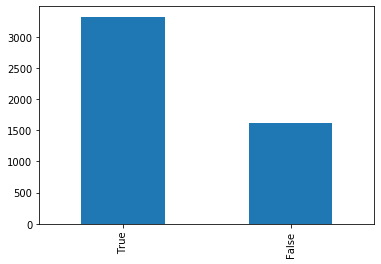

In [14]:
#visualizing this contrast

df['county_population_increased_2015_2016'].value_counts().plot(kind='bar')


Just looking at those numbers we would think that it's twice as likely that the target value for Pike County is true rather than false. For more precision, we could see what the typical value is for Kentucky (by checking the mean dependent variable value for that state), or we could use a KNN imputation approach based on counties with similar demographics-- or some combination of these aproaches or others.

For now though we will just set this county name aside to impute later, and drop it from the df since we have a lot of data and one county won't have a larger impact on the model or its development.

In [15]:
df = df.dropna() 

In [16]:
df.shape

(4945, 42)

In [17]:
#Changing the target variable to binary 0,1

f = lambda x: 1 if x== True else 0
df['county_population_increased_2015_2016'] = df['county_population_increased_2015_2016'].apply(f)

df['county_population_increased_2015_2016'].value_counts() #just to check

1    3323
0    1622
Name: county_population_increased_2015_2016, dtype: int64

In [18]:
#Basic stats

df.describe()

,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,female_age_25_to_29_pct,female_age_30_to_34_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
count,4945.000000,4945.00000,4.945000e+03,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,...,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000
mean,0.671992,2012.50819,1.651385e+05,5.931850,6.227806,6.332113,6.756663,7.052781,6.286775,6.242022,...,6.534621,6.816684,7.134580,6.593913,5.804772,4.524408,3.245683,2.272437,1.569403,1.273468
std,0.469535,1.70711,2.902534e+05,1.128977,1.202721,1.166060,1.412234,2.626764,1.349550,1.049843,...,1.071138,0.961127,0.926599,1.084544,1.148760,1.271805,1.143455,0.866279,0.653829,0.591269
min,0.000000,2010.00000,2.593500e+04,1.700000,1.700000,1.900000,2.100000,0.800000,1.900000,1.800000,...,2.400000,2.700000,2.600000,2.900000,2.200000,1.600000,0.700000,0.300000,0.000000,0.000000
25%,0.000000,2011.00000,4.829300e+04,5.200000,5.500000,5.600000,6.000000,5.600000,5.400000,5.600000,...,5.800000,6.200000,6.600000,5.900000,5.000000,3.700000,2.500000,1.700000,1.100000,0.900000
50%,1.000000,2013.00000,7.852900e+04,5.800000,6.100000,6.300000,6.500000,6.400000,6.100000,6.200000,...,6.500000,6.800000,7.200000,6.600000,5.800000,4.400000,3.100000,2.100000,1.500000,1.200000
75%,1.000000,2014.00000,1.626590e+05,6.600000,6.900000,7.000000,7.200000,7.500000,7.000000,6.800000,...,7.200000,7.400000,7.800000,7.300000,6.500000,5.100000,3.700000,2.600000,1.900000,1.600000
max,1.000000,2015.00000,5.160965e+06,12.800000,11.800000,10.600000,16.500000,23.700000,16.800000,12.800000,...,11.700000,10.300000,10.600000,10.800000,11.600000,18.200000,18.300000,11.400000,7.800000,5.200000


In [21]:
#Separating female and male variables and taking a look at their distributions

female_pops = [col for col in df.columns if 'female_age' in col]
print(female_pops)

['female_age_under_5_pct', 'female_age_5_to_9_pct', 'female_age_10_to_14_pct', 'female_age_15_to_19_pct', 'female_age_20_to_24_pct', 'female_age_25_to_29_pct', 'female_age_30_to_34_pct', 'female_age_35_to_39_pct', 'female_age_40_to_44_pct', 'female_age_45_to_49_pct', 'female_age_50_to_54_pct', 'female_age_55_to_59_pct', 'female_age_60_to_64_pct', 'female_age_65_to_69_pct', 'female_age_70_to_74_pct', 'female_age_75_to_79_pct', 'female_age_80_to_84_pct', 'female_age_85_and_over_pct']


In [22]:
#total_pops to get males + females since 'male' is in 'female'
total_pops = [col for col in df.columns if 'male_age' in col] 

#get rid of the females to leave just the males
male_pops = [elem for elem in total_pops if 'female_age' not in elem]
  
print(male_pops)

['male_age_under_5_pct', 'male_age_5_to_9_pct', 'male_age_10_to_14_pct', 'male_age_15_to_19_pct', 'male_age_20_to_24_pct', 'male_age_25_to_29_pct', 'male_age_30_to_34_pct', 'male_age_35_to_39_pct', 'male_age_40_to_44_pct', 'male_age_45_to_49_pct', 'male_age_50_to_54_pct', 'male_age_55_to_59_pct', 'male_age_60_to_64_pct', 'male_age_65_to_69_pct', 'male_age_70_to_74_pct', 'male_age_75_to_79_pct', 'male_age_80_to_84_pct', 'male_age_85_and_over_pct']


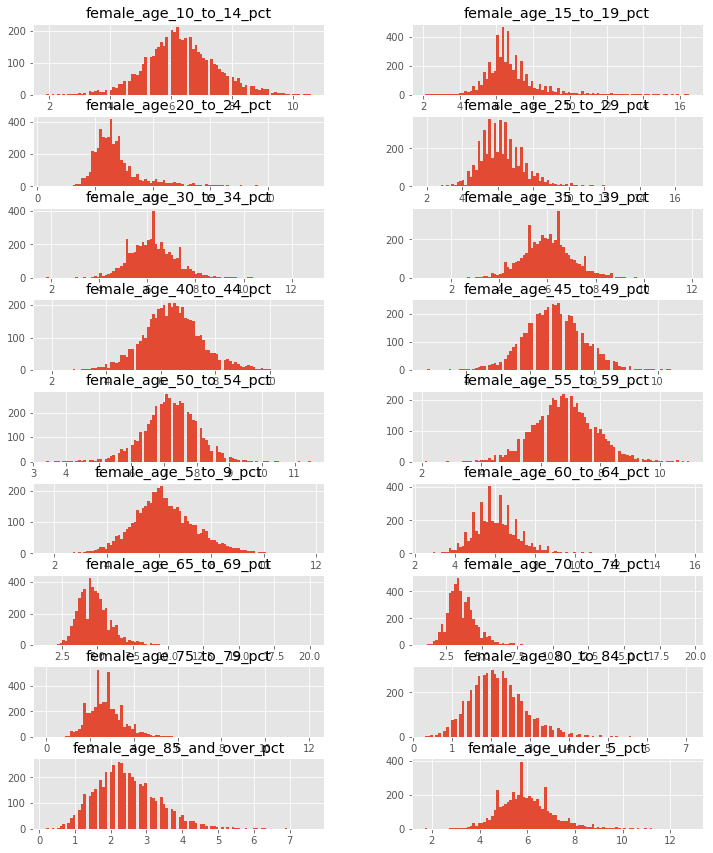

In [23]:
matplotlib.style.use('ggplot')

#the variables related to females
df[female_pops].hist(stacked=False, bins=100, figsize=(12,30), layout=(18,2));#Maybe break down by female and male, probably useful later anyhow

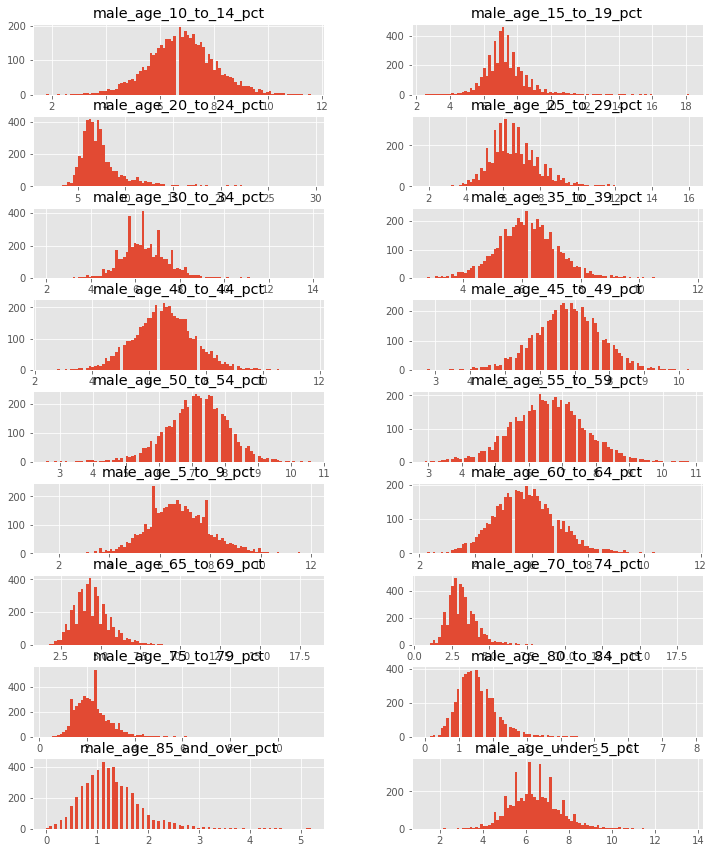

In [24]:
#the variables related to males
df[male_pops].hist(stacked=False, bins=100, figsize=(12,30), layout=(18,2));

Most of the distributions are fairly normal, with a few skewed, indicated higher mortality
rates. 

### States

In [26]:
#Exploring the states variable

df['state'].value_counts()  

Texas                   317
California              240
Florida                 240
Pennsylvania            240
North Carolina          238
New York                234
Ohio                    229
Georgia                 213
Virginia                180
Michigan                174
Indiana                 150
Illinois                138
Wisconsin               138
Alabama                 126
New Jersey              126
South Carolina          126
Tennessee               120
Washington              114
Missouri                102
Louisiana               102
Maryland                 96
Oregon                   90
Minnesota                79
Kentucky                 72
Massachusetts            72
Colorado                 67
Oklahoma                 66
Arkansas                 66
Puerto Rico              66
Arizona                  60
Iowa                     60
Mississippi              60
New Mexico               58
Connecticut              48
Kansas                   48
West Virginia       

In [27]:
#Examining mean of target variable for each state

state_mean_increases = df.groupby('state', as_index=False)['county_population_increased_2015_2016'].mean()
state_mean_increases
state_mean_increases.sort_values(['county_population_increased_2015_2016'], ascending = False)

,state,county_population_increased_2015_2016
42,South Dakota,1.000000
8,District of Columbia,1.000000
28,Nevada,1.000000
46,Vermont,1.000000
45,Utah,1.000000
48,Washington,1.000000
12,Idaho,1.000000
9,Florida,1.000000
27,Nebraska,1.000000
7,Delaware,1.000000


For 10 states the population increased in all counties in 2015_2016. Those states include Florida with a large number of counties (240), as well as DC and Vermont with only 6 counties apiece.

In two states the population never increased: Puerto Rico (66 counties), and Connecticut (48). The population rarely increased in New York counties in 2015-2016, which was surprising to me until I thought about the more
rural areas. 

In [28]:
df[df['state']== "New York"] #just curious

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
564,Albany County,New York,0,2010,156150,4.6,4.8,5.9,7.3,8.9,...,6.8,7.2,7.4,6.6,6.2,3.4,3.0,2.2,1.8,1.3
565,Bronx County,New York,1,2010,736878,6.9,6.4,6.8,7.6,7.7,...,7.1,6.9,6.2,4.8,4.3,3.0,2.1,1.5,1.1,0.8
566,Broome County,New York,0,2010,101916,4.7,5.1,5.2,8.2,8.4,...,5.1,7.4,8.1,7.2,5.4,4.4,2.8,2.9,2.1,1.6
567,Cattaraugus County,New York,0,2010,40023,5.6,5.6,6.8,6.6,6.2,...,7.7,7.6,8.5,8.2,6.3,4.6,3.2,3.0,1.7,1.1
568,Cayuga County,New York,0,2010,38912,4.8,6.5,5.3,7.1,5.2,...,8.3,8.6,8.4,6.5,6.5,3.8,3.7,2.9,1.8,1.0
569,Chautauqua County,New York,0,2010,68185,5.6,5.9,5.9,7.8,6.7,...,5.5,7.7,7.6,6.4,7.4,4.5,4.0,2.4,2.4,1.8
570,Chemung County,New York,0,2010,44088,5.4,5.5,6.6,6.0,7.0,...,5.3,7.5,7.8,6.6,7.0,3.7,3.2,2.5,2.3,1.2
571,Clinton County,New York,0,2010,40471,5.3,5.5,4.7,7.9,8.5,...,7.2,9.5,7.9,7.8,4.0,3.6,3.7,2.6,1.2,1.1
572,Dutchess County,New York,0,2010,149224,5.0,6.6,6.0,7.4,7.1,...,6.0,8.7,8.3,7.5,5.2,3.5,3.1,2.6,1.8,0.8
573,Erie County,New York,0,2010,475288,5.0,5.6,5.8,6.9,7.1,...,6.8,7.6,8.0,7.1,5.7,3.8,3.1,2.3,2.3,1.7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a194c52b0>]],
      dtype=object)

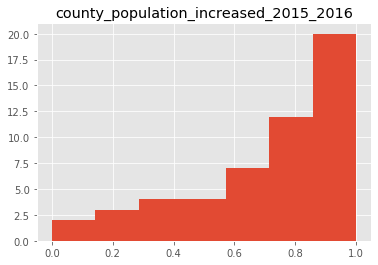

In [29]:
#Visualizing table to show the spread of the state means for the dependent variable

state_mean_increases.sort_values(['county_population_increased_2015_2016'], ascending = False).hist(bins='auto')

Observation:
    
State is thus an important feature to consider in a model. (And it is probably more predictive in states with 
more counties.)

In [32]:
#More exploration, getting familiar with the data

df.sort_values(['county name', 'year'], ascending = True)

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
315,Ada County,Idaho,1,2010,196320,6.8,7.7,7.2,6.6,6.2,...,8.8,7.3,7.0,5.6,5.3,3.1,2.4,1.4,1.3,1.1
1389,Ada County,Idaho,1,2011,200628,6.9,8.2,6.6,6.2,6.5,...,7.5,6.4,7.1,6.2,5.0,3.2,2.7,1.8,1.0,1.0
2259,Ada County,Idaho,1,2012,203740,6.4,7.7,7.1,6.1,6.8,...,6.7,6.8,6.8,5.9,5.7,4.1,2.2,1.5,1.0,1.3
3041,Ada County,Idaho,1,2013,206913,5.6,7.3,7.7,6.4,6.6,...,7.2,7.0,6.8,6.3,5.3,4.4,2.4,1.5,1.3,1.1
3871,Ada County,Idaho,1,2014,212722,6.1,7.5,6.9,6.7,6.0,...,7.6,6.5,6.7,5.4,6.0,4.5,2.8,2.1,0.8,1.3
4167,Ada County,Idaho,1,2015,216310,5.8,6.7,7.5,6.5,6.1,...,6.8,6.8,6.6,6.4,5.1,5.1,2.6,1.9,1.4,0.9
33,Adams County,Pennsylvania,0,2010,51986,5.4,5.7,6.8,6.8,6.8,...,6.5,8.5,7.9,7.0,6.5,4.6,3.6,2.6,2.0,1.6
214,Adams County,Colorado,1,2010,221170,8.3,7.8,7.9,6.7,6.5,...,7.0,6.8,6.2,5.8,3.7,2.7,1.7,1.5,0.6,0.6
321,Adams County,Illinois,0,2010,34387,6.5,5.8,6.2,6.6,4.8,...,4.7,7.2,7.3,6.2,6.4,4.3,3.6,2.4,2.4,2.8
1142,Adams County,Pennsylvania,0,2011,51388,5.0,5.4,6.5,6.8,6.5,...,7.8,7.7,7.7,7.0,6.5,5.2,3.4,3.1,1.6,1.7


We can see from looking over the sorted data above that there are multiple counties with the same name in different states: there is an Adams County in Colorado, Illinois and Pennsylania.

In [33]:
df['county name'].value_counts()

Washington County         54
Jefferson County          54
Madison County            42
Montgomery County         42
Lake County               30
Orange County             30
Wayne County              30
Monroe County             30
Douglas County            30
Franklin County           30
Clark County              24
Cumberland County         24
Marion County             24
York County               24
Johnson County            24
Jackson County            24
Warren County             24
Middlesex County          18
Erie County               18
St. Clair County          18
Rockingham County         18
Adams County              18
Fayette County            18
Kent County               18
Delaware County           18
Williamson County         18
Wood County               18
Columbia County           18
Butler County             18
Putnam County             18
                          ..
Deschutes County           6
Johnston County            6
Dane County                6
New Haven Coun

Each county should appear 6 times, once for every year from 2010 to 2015.

We can see from the numbers at the top that multiple counties with the same name exist in multiple states, so it will be important to indicate the state for each county.

The counts on the top of the list are all multiples of 6. but we can't see all the names. We should look for counties that appear numbers of times that are not multiples of 6, since that would mean some missing years (rows) of data

There seem to be some issues with the 10 counties listed at the bottom of the list, which show up between 1 and 5 times (rather than 6 times). I looked and doesn't seem to be 
a question of spelling errors.

In [34]:
#Looking at one of the counties with a missing value

df[df['county name']=='Otero County'] #We can see here that the missing year is 2010


,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
862,Otero County,New Mexico,1,2011,31435,5.2,6.7,7.7,7.4,6.6,...,4.8,5.4,7.6,3.4,7.3,4.4,4.5,2.4,1.4,1.2
1977,Otero County,New Mexico,1,2012,32101,7.5,9.5,5.3,7.3,5.6,...,6.7,5.1,7.0,5.2,6.5,5.7,2.3,1.4,2.0,2.1
2497,Otero County,New Mexico,1,2013,31941,6.7,8.7,4.4,6.7,7.4,...,5.9,5.1,5.7,4.7,5.8,6.5,3.8,3.6,1.2,0.9
3436,Otero County,New Mexico,1,2014,32107,9.0,5.3,8.2,4.9,6.8,...,5.8,4.7,5.6,6.7,5.4,5.8,3.5,3.4,1.2,1.0
4820,Otero County,New Mexico,1,2015,31830,7.3,6.9,7.8,6.7,5.6,...,8.1,4.6,4.7,6.5,5.2,4.9,4.6,3.0,0.8,2.4


In [35]:
#Each county should appear a multiple of 6 times

(df['county name'].value_counts() % 6 == 0).value_counts()


True     649
False     12
Name: county name, dtype: int64

So in addition to the 10 counties starting with Lea County at the bottom of the list, 
there are an additional 2 counties where there are some missing rows

In [36]:
vc= df.groupby(['county name']).count()['state']  #vc for value counts

In [37]:
#Here are the problematic counties

vc[vc%6 != 0]

county name
Athens County              1
Blue Earth County          4
Broomfield County          1
Catoosa County             4
Chatham County            10
Lea County                 5
Lewis and Clark County     3
Liberty County            11
Nacogdoches County         5
Otero County               5
Rice County                3
Ward County                3
Name: state, dtype: int64

Since there are duplicate county names in different states, it's important to bring county and state names together

In [38]:
df['full_county_state'] = df['county name'] + " " + df['state']

In [39]:
#Here are the problematic counties again, but with their states too.
#None are on the East Coast, for what it's worth.

vc= df.groupby(['full_county_state']).count()['state']

vc[vc%6 != 0]

full_county_state
Athens County Ohio                1
Blue Earth County Minnesota       4
Broomfield County Colorado        1
Catoosa County Georgia            4
Chatham County North Carolina     4
Lea County New Mexico             5
Lewis and Clark County Montana    3
Liberty County Georgia            5
Nacogdoches County Texas          5
Otero County New Mexico           5
Rice County Minnesota             3
Ward County North Dakota          3
Name: state, dtype: int64

Later, could impute values with model based on what's typical per state, or in the other years in the same county, or KNN, etc. 


 12_counties_w_missing_rows= ['Athens County Ohio', 'Blue Earth County Minnesota', 'Broomfield County Colorado', 
                    'Catoosa County Georgia', 'Chatham County North Carolina', 'Lea County New Mexico',
                    'Lewis and Clark County Montana', 'Liberty County Georgia', 'Nacogdoches County Texas',
                    'Otero County New Mexico', 'Rice County Minnesota', 'Ward County North Dakota']

### More Cleaning 

Another thing to check in terms of the data quality is that the percentages for all the female columns and all
the male columns add up to roughly 100%

In [40]:
female_pops = [col for col in df.columns if 'female_age' in col]
print(female_pops)

['female_age_under_5_pct', 'female_age_5_to_9_pct', 'female_age_10_to_14_pct', 'female_age_15_to_19_pct', 'female_age_20_to_24_pct', 'female_age_25_to_29_pct', 'female_age_30_to_34_pct', 'female_age_35_to_39_pct', 'female_age_40_to_44_pct', 'female_age_45_to_49_pct', 'female_age_50_to_54_pct', 'female_age_55_to_59_pct', 'female_age_60_to_64_pct', 'female_age_65_to_69_pct', 'female_age_70_to_74_pct', 'female_age_75_to_79_pct', 'female_age_80_to_84_pct', 'female_age_85_and_over_pct']


In [41]:
df_female= df[female_pops]
total_female_pct = df_female.sum(axis=1)  #axis = 1 is columns

#use  np.logical_or bc othewise ambiguous (check element by element)
mask = np.logical_or ((total_female_pct > 100.3), (total_female_pct < 99.7))


In [42]:
df[mask]


,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct,full_county_state
74,Newport County,Rhode Island,1,2010,43374,4.8,4.9,5.3,6.2,5.9,...,8.0,7.5,8.4,6.2,4.9,3.6,2.9,2.3,1.2,Newport County Rhode Island
162,Yuma County,Arizona,1,2010,97924,7.5,8.0,7.6,7.6,6.8,...,5.7,6.0,4.6,4.9,4.0,4.3,3.6,1.6,1.5,Yuma County Arizona
216,Boulder County,Colorado,1,2010,147523,5.2,6.4,5.7,7.8,9.5,...,7.3,7.3,6.7,5.2,3.9,1.5,1.7,0.7,1.0,Boulder County Colorado
244,Collier County,Florida,1,2010,162493,4.6,5.0,5.3,5.5,4.3,...,6.1,5.9,5.3,6.9,7.3,6.1,5.8,3.7,2.7,Collier County Florida
246,Duval County,Florida,1,2010,445881,6.5,5.6,6.7,6.5,7.3,...,7.4,7.2,6.2,5.1,3.6,2.0,1.8,1.1,0.9,Duval County Florida
302,Muscogee County,Georgia,0,2010,99470,7.2,6.1,6.8,7.3,7.6,...,6.7,6.9,5.8,4.4,3.3,2.2,1.8,1.9,0.5,Muscogee County Georgia
684,Galveston County,Texas,1,2010,147892,6.8,6.3,7.4,6.4,5.3,...,7.8,7.9,7.3,5.0,3.5,2.6,1.8,1.3,0.9,Galveston County Texas
767,Lewis County,Washington,1,2010,37496,5.5,6.5,5.9,6.2,5.7,...,6.9,7.2,7.6,6.2,4.8,4.4,3.4,1.5,1.9,Lewis County Washington
852,Salem County,New Jersey,0,2011,33740,5.4,5.6,6.5,6.1,5.8,...,7.7,8.4,6.1,7.5,5.0,2.8,1.9,1.5,1.8,Salem County New Jersey
870,Cattaraugus County,New York,0,2011,40650,6.0,6.8,5.8,6.8,6.0,...,7.4,8.2,7.6,6.8,5.0,3.2,2.6,1.7,1.9,Cattaraugus County New York


In [43]:
#Checking to see if any totals are straying too much from 100%

total_female_pct[mask]

74      100.3
162     100.3
216     100.3
244      99.7
246     100.3
302     100.3
684      99.6
767     100.4
852      99.6
870      99.6
884      99.7
893     100.4
1054     99.6
1104     99.7
1497    100.3
1510     99.7
1570    100.3
1635     99.7
1683    100.3
1706    100.3
1826    100.3
1830    100.3
1873     99.7
1980    100.3
2076     99.7
2120     99.7
2124     99.7
2152     99.6
2153    100.4
2187    100.3
2400    100.3
2408    100.3
2430    100.3
2584    100.4
2597    100.3
2601    100.4
2615     99.7
2664     99.6
2759    100.3
2780     99.7
2868    100.3
2930    100.3
3034    100.3
3105     99.7
3269     99.7
3280     99.7
3287    100.3
3290    100.3
3307    100.3
3392    100.3
3507    100.3
3567    100.3
3705    100.3
3801     99.7
3819     99.7
3993     99.7
4033    100.3
4573    100.3
4653    100.4
4870     99.7
dtype: float64

In [ ]:
#data quality not an issue here

In [44]:
#doing the same check for the male populations

df_male= df[male_pops]
total_male_pct = df_male.sum(axis=1)   


mask2 = np.logical_or ((total_male_pct > 100.3), (total_male_pct < 99.7)) 

In [45]:
df[mask2]

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct,full_county_state
30,Umatilla County,Oregon,0,2010,36177,7.7,6.5,8.9,7.8,5.5,...,7.1,6.2,6.2,6.5,3.6,3.6,1.5,1.8,1.3,Umatilla County Oregon
46,Columbia County,Pennsylvania,0,2010,35568,5.1,4.1,4.6,9.9,10.6,...,7.4,7.5,7.1,6.4,4.6,3.4,3.1,1.9,1.4,Columbia County Pennsylvania
219,El Paso County,Colorado,1,2010,314006,7.0,7.3,6.7,6.8,7.3,...,7.4,7.2,5.3,5.2,3.1,2.0,1.7,1.0,0.9,El Paso County Colorado
303,Newton County,Georgia,1,2010,51811,6.8,6.8,8.3,8.3,4.6,...,7.1,6.3,5.8,4.2,2.6,2.6,2.3,0.8,0.2,Newton County Georgia
516,St. Francois County,Missouri,1,2010,30305,4.5,7.1,6.6,6.8,5.7,...,9.3,6.1,6.4,4.8,3.5,3.8,1.4,2.3,0.8,St. Francois County Missouri
717,Wichita County,Texas,1,2010,63988,6.3,5.9,6.9,6.3,10.0,...,8.0,6.1,5.2,4.2,2.9,2.8,2.7,1.6,1.0,Wichita County Texas
772,Thurston County,Washington,1,2010,129461,5.6,7.4,4.7,6.3,7.0,...,7.0,7.2,6.7,6.4,4.4,2.5,2.2,1.1,1.6,Thurston County Washington
777,Harrison County,West Virginia,0,2010,35207,5.1,6.7,4.7,6.1,4.7,...,7.6,7.9,9.7,5.3,4.8,3.2,3.3,0.9,1.8,Harrison County West Virginia
813,Toa Alta Municipio,Puerto Rico,0,2010,38137,6.1,7.3,7.7,8.0,6.6,...,7.4,6.4,6.2,3.4,3.1,2.8,1.7,1.3,0.2,Toa Alta Municipio Puerto Rico
822,Gallatin County,Montana,1,2011,44795,6.6,6.3,5.0,7.3,11.0,...,5.8,6.5,6.4,3.8,3.7,2.6,0.9,1.1,1.5,Gallatin County Montana


In [47]:
total_male_pct[mask2]

30       99.7
46      100.3
219     100.3
303      99.7
516      99.7
717      99.7
772      99.7
777     100.3
813     100.3
822      99.7
961     100.3
991      99.7
1131    100.3
1168     99.7
1232    100.4
1248     99.6
1422     99.7
1565     99.6
1625    100.4
1834    100.3
1898    100.3
2099    100.3
2178    100.3
2479    100.4
2496     99.7
2624     99.7
2787     99.6
3039     99.7
3320     99.5
3378    100.3
3467    100.3
3519    100.4
3539     99.7
3556    100.4
3604    100.3
3888     99.7
3921    100.3
3947    100.4
4104     99.7
4199     99.7
4227    100.3
4311     99.7
4375     99.7
4409    100.4
4416    100.3
4429    100.4
4437     99.7
4454    100.4
4510     99.7
4533    100.3
4609     99.7
4620    100.3
4740    100.3
4813    100.4
4915     99.7
4917    100.3
4939    100.3
dtype: float64

In [48]:
#again, the data seems fine

### Bigger picture considerations -  model development

In terms of the big picture, the variables that impact population are births, deaths and moving/migration. In some cases the birth rate and death rate will balance out and migration will be especially important. 

In other cases, the percentage of women of childbearing years, and the percentage of older folks would likely have an important impact. We should consider how to use that information in a model or collection of models.

There should also be a focus on trends in the total population. One would think that if the population has
grown in the past five years -- or perhaps particularly if the population of women has grown consistently --
then it is more likely to grow again in the 6th year (2015-16 in this case). I will call that protracted growth
trend "momentum".

We might also consider a random forest as a baseline model using all the numerical data, plus a target encoded version of the categorial 'state' variable. 

Another approach is to use different models on different parts of the data, using the momentum idea to make predictions for counties where the predictions are especially easy to make, and the random forest approach on the remaining counties where it is not as easy to make a prediction. A gradient booster decision tree might also gain us an additional few percent higher in accuracy. 

Other approaches are possible, but this might be a way to go in the given time window..   

In [50]:
#Let's take a look at the data a bit more and do a little research on population growth.

In [51]:
df[female_pops].sum().sort_values(ascending=False) #just curious

female_age_50_to_54_pct       35547.0
female_age_20_to_24_pct       34876.0
female_age_55_to_59_pct       33617.0
female_age_45_to_49_pct       33423.9
female_age_15_to_19_pct       33411.7
female_age_40_to_44_pct       31744.8
female_age_10_to_14_pct       31312.3
female_age_25_to_29_pct       31088.1
female_age_30_to_34_pct       30866.8
female_age_5_to_9_pct         30796.5
female_age_60_to_64_pct       30075.4
female_age_35_to_39_pct       29794.2
female_age_under_5_pct        29333.0
female_age_65_to_69_pct       23972.7
female_age_70_to_74_pct       18023.1
female_age_75_to_79_pct       13627.8
female_age_85_and_over_pct    12184.9
female_age_80_to_84_pct       10815.8
dtype: float64

In [ ]:
# The oldsters and the youngsters are least common, which is not surprising.

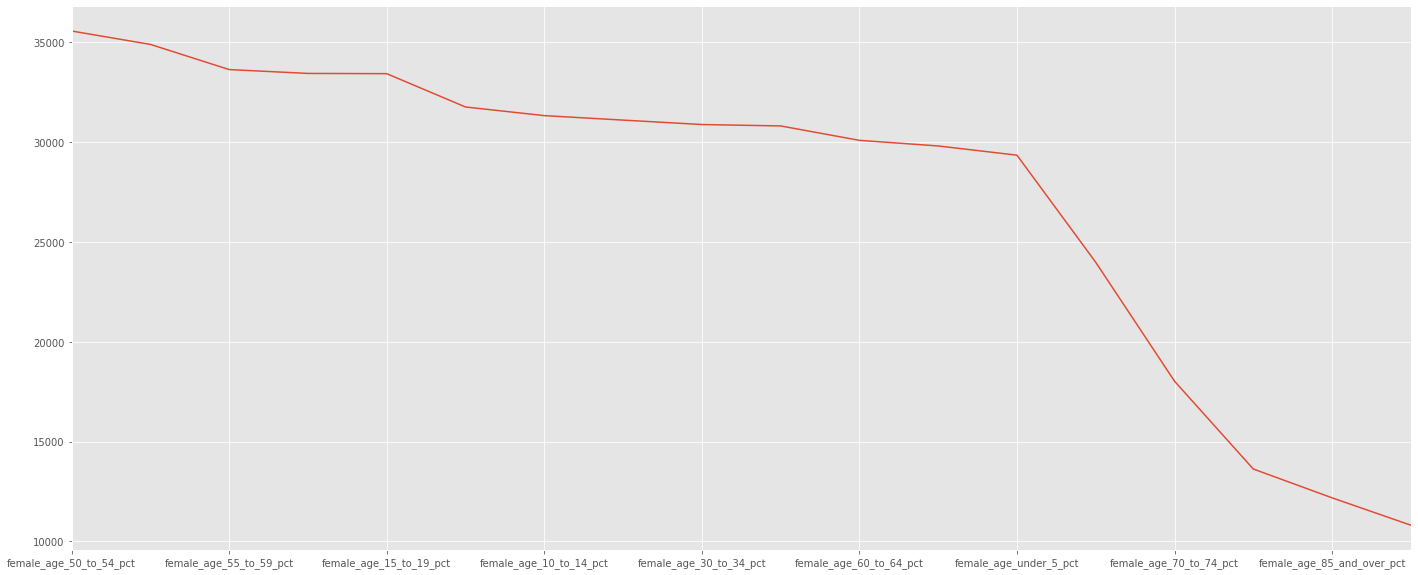

In [52]:
df[female_pops].sum().sort_values(ascending=False).plot(figsize= (24, 10))

We can see above the precipitous drop from female_age_under_5_pct (29333.0)
to female_age_65_to_69_pct (23972.7) and the other older folks cohorts

### Research on birth rates and death rates 

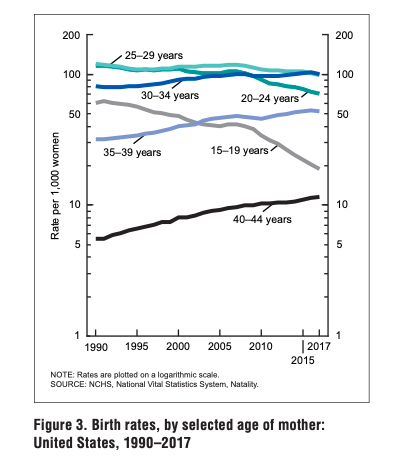

In [54]:
#Here are birth rates for different age groups of childbearing age women
#(data might consider incoporating):

from IPython.display import Image
from IPython.core.display import HTML 
path = '/Users/Dolly/Desktop/Image.png'
Image(filename = path, width=500, height=500)

#The following chart comes from The National Vital Statistics Report at
#https://www.cdc.gov/nchs/data/nvsr/nvsr67/nvsr67_08-508.pdf

In [ ]:
# Could make an equation with coefficients based on these numbers combined with demographic
#information and the total population, holding on to this info for possible use later..   

In 2015, rough numbers based on chart above:

        births per thousand    per 170,000
40-44         10                     1700
25-29        100                    17000
30-34        100                    17000
35-39         50                      850
15-19         15                      255

From: https://www.cdc.gov/nchs/data/nhsr/nhsr113.pdf National Health Statistics Report, July 11, 2018 "Fertility of Men and Women Aged 15–44 in the United States: National Survey of Family Growth, 2011–2015"

For 2011–2015, 85.0% of women had given birth and 80.4% of men had fathered a child by ages 40–44.

On average, women had 1.2 biological children and men had fathered 0.9 children.

The mean age at first birth was 23.1 for women and 25.5 for men. Among women, 31.2% of first births occurred during the teen years and 54.5% occurred during ages 20–29.

Among men, 13.8% of first births occurred during the teen years and 63.1% occurred during ages 20–29.

In 2011–2015, nearly one-third of women aged 15–44 with a birth had only had one birth at the time of interview, about one-third had a second birth within 36 months, and one-third had a second birth more than 36 months after their first birth.

(Estimates of fertility measures differed by age, marital or cohabiting status, education, household income relative to the federal poverty level, and Hispanic origin and race.)

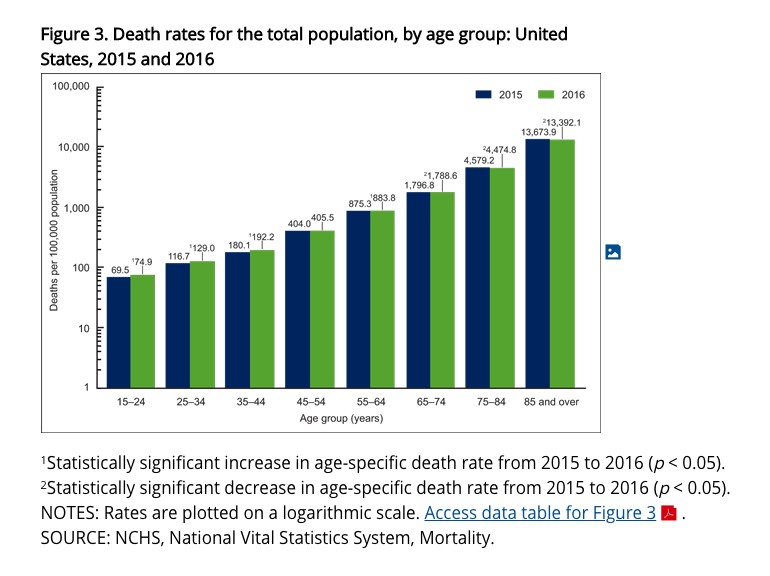

In [55]:
path = "/Users/Dolly/Desktop/Image2.png"
Image(filename = path, width=800, height=800)

In [ ]:
# The death rate seems to rise relatively consistently 

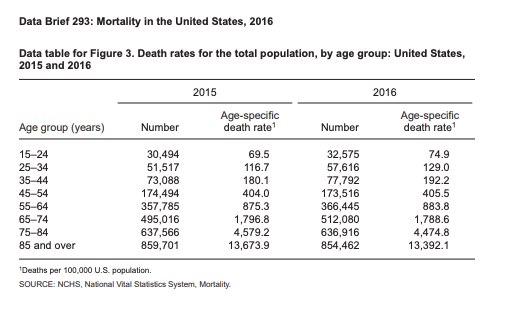

In [56]:
#Here is the table that generated the chart above

path = "/Users/Dolly/Desktop/Image3.png"
Image(filename = path, width=700, height=700)

Death rates by age, from:

Kochanek KD, Murphy SL, Xu JQ, Arias E. Mortality in the United States, 2016. NCHS Data Brief, no 293. Hyattsville, MD: National Center for Health Statistics. 2017.

In [57]:
df1= df

### Flattening the database 

In [59]:
# If trying to predict from year to year, useful to flatten the df so that years are not all in one column,
#and the data is successive across rows in terms of time

In [60]:
value_columns = [col for col in df.columns if col not in ['county name', 'state', 'county_population_increased_2015_2016', 'full_county_state', 'year']]
value_columns


['female_total_population',
 'female_age_under_5_pct',
 'female_age_5_to_9_pct',
 'female_age_10_to_14_pct',
 'female_age_15_to_19_pct',
 'female_age_20_to_24_pct',
 'female_age_25_to_29_pct',
 'female_age_30_to_34_pct',
 'female_age_35_to_39_pct',
 'female_age_40_to_44_pct',
 'female_age_45_to_49_pct',
 'female_age_50_to_54_pct',
 'female_age_55_to_59_pct',
 'female_age_60_to_64_pct',
 'female_age_65_to_69_pct',
 'female_age_70_to_74_pct',
 'female_age_75_to_79_pct',
 'female_age_80_to_84_pct',
 'female_age_85_and_over_pct',
 'male_total_population',
 'male_age_under_5_pct',
 'male_age_5_to_9_pct',
 'male_age_10_to_14_pct',
 'male_age_15_to_19_pct',
 'male_age_20_to_24_pct',
 'male_age_25_to_29_pct',
 'male_age_30_to_34_pct',
 'male_age_35_to_39_pct',
 'male_age_40_to_44_pct',
 'male_age_45_to_49_pct',
 'male_age_50_to_54_pct',
 'male_age_55_to_59_pct',
 'male_age_60_to_64_pct',
 'male_age_65_to_69_pct',
 'male_age_70_to_74_pct',
 'male_age_75_to_79_pct',
 'male_age_80_to_84_pct',
 'm

In [62]:
df.pivot(index='full_county_state', columns= 'year', values= value_columns)

#Need to add back in 'county_population_increased_2015_2016'

female_total_population                      \
year                                              2010      2011      2012   
full_county_state                                                            
Ada County Idaho                              196320.0  200628.0  203740.0   
Adams County Colorado                         221170.0  223932.0  228639.0   
Adams County Illinois                          34387.0   34190.0   34567.0   
Adams County Pennsylvania                      51986.0   51388.0   51563.0   
Aiken County South Carolina                    82794.0   83451.0   84735.0   
Alachua County Florida                        128255.0  128209.0  129164.0   
Alamance County North Carolina                 79306.0   81164.0   80720.0   
Alameda County California                     771391.0  779191.0  792168.0   
Albany County New York                        156150.0  156864.0  157823.0   
Albemarle County Virginia                      52238.0   52299.0   52563.0   
Alexandria city Virginia                       71867.0   74254.0   75847.0   
Allegan County Michigan                        55992.0   56170.0   56309.0   
Allegany County Maryland                       35503.0   35910.0   35520.0   
Allegheny County Pennsylvania                 637591.0  638510.0  639152.0   
Allen County Indiana                          182479.0  183528.0  184720.0   
Allen County Ohio                              53568.0   52628.0   52335.0   
Anchorage Municipality Alaska                 144661.0  147271.0  146858.0   
Anderson County South Carolina                 97062.0   97122.0   97615.0   
Anderson County Tennessee                      38720.0   39139.0   38237.0   
Androscoggin County Maine                      55181.0   54144.0   54433.0   
Angelina County Texas                          44327.0   43953.0   44817.0   
Anne Arundel County Maryland                  271836.0  276168.0  278474.0   
Anoka County Minnesota                        165984.0  166473.0  167900.0   
Apache County Arizona                          36021.0   35473.0   36858.0   
Arapahoe County Colorado                      292849.0  298017.0  302902.0   
Arecibo Municipio Puerto Rico                  50025.0   49742.0   49192.0   
Arlington County Virginia                     104587.0  108414.0  110945.0   
Armstrong County Pennsylvania                  35077.0   34525.0   34500.0   
Aroostook County Maine                         36576.0   36117.0   36351.0   
Ascension Parish Louisiana                     54507.0   56391.0   56771.0   
...                                                ...       ...       ...   
Wichita County Texas                           63988.0   64025.0   63286.0   
Wicomico County Maryland                       52227.0   50723.0   52388.0   
Wilkes County North Carolina                   34574.0   35173.0   35098.0   
Will County Illinois                          341277.0  343871.0  343546.0   
Williamson County Illinois                     33551.0   34072.0   33655.0   
Williamson County Tennessee                    95128.0   95357.0   98625.0   
Williamson County Texas                       217017.0  225239.0  231399.0   
Wilson County North Carolina                   42705.0   43549.0   43631.0   
Wilson County Tennessee                        57559.0   59761.0   61243.0   
Windham County Connecticut                     60483.0   59477.0   59122.0   
Winnebago County Illinois                     151273.0  150818.0  149471.0   
Winnebago County Wisconsin                     81851.0   84277.0   84063.0   
Wood County Ohio                               64016.0   64873.0   65563.0   
Wood County West Virginia                      44894.0   44607.0   44980.0   
Wood County Wisconsin                          37848.0   37980.0   38165.0   
Woodbury County Iowa                           52090.0   53307.0   50782.0   
Worcester County Massachusetts                405658.0  405956.0  408395.0   
Wright County Minnesota                        62159.

In [64]:
df_flat = df.pivot(index='full_county_state', columns= 'year', values= value_columns)

In [65]:
#flatten multi index

df_flat.columns.values

array([('female_total_population', 2010),
       ('female_total_population', 2011),
       ('female_total_population', 2012),
       ('female_total_population', 2013),
       ('female_total_population', 2014),
       ('female_total_population', 2015),
       ('female_age_under_5_pct', 2010), ('female_age_under_5_pct', 2011),
       ('female_age_under_5_pct', 2012), ('female_age_under_5_pct', 2013),
       ('female_age_under_5_pct', 2014), ('female_age_under_5_pct', 2015),
       ('female_age_5_to_9_pct', 2010), ('female_age_5_to_9_pct', 2011),
       ('female_age_5_to_9_pct', 2012), ('female_age_5_to_9_pct', 2013),
       ('female_age_5_to_9_pct', 2014), ('female_age_5_to_9_pct', 2015),
       ('female_age_10_to_14_pct', 2010),
       ('female_age_10_to_14_pct', 2011),
       ('female_age_10_to_14_pct', 2012),
       ('female_age_10_to_14_pct', 2013),
       ('female_age_10_to_14_pct', 2014),
       ('female_age_10_to_14_pct', 2015),
       ('female_age_15_to_19_pct', 2010),
       ('f

In [66]:
#fixing the column names, joining them

df_flat= df_flat.reset_index() # reset index to 0 1 2 3

new_columns = []

for col in df_flat.columns.values:
    string_name = []
    for c in col:
        string_name.append(str(c))
        
    newcol = " ". join(string_name).strip()
    new_columns.append(newcol)
df_flat.columns = new_columns

df_flat

,full_county_state,female_total_population 2010,female_total_population 2011,female_total_population 2012,female_total_population 2013,female_total_population 2014,female_total_population 2015,female_age_under_5_pct 2010,female_age_under_5_pct 2011,female_age_under_5_pct 2012,...,male_age_80_to_84_pct 2012,male_age_80_to_84_pct 2013,male_age_80_to_84_pct 2014,male_age_80_to_84_pct 2015,male_age_85_and_over_pct 2010,male_age_85_and_over_pct 2011,male_age_85_and_over_pct 2012,male_age_85_and_over_pct 2013,male_age_85_and_over_pct 2014,male_age_85_and_over_pct 2015
0,Ada County Idaho,196320.0,200628.0,203740.0,206913.0,212722.0,216310.0,6.8,6.9,6.4,...,1.0,1.3,0.8,1.4,1.1,1.0,1.3,1.1,1.3,0.9
1,Adams County Colorado,221170.0,223932.0,228639.0,232460.0,238913.0,244156.0,8.3,8.1,7.9,...,0.8,0.9,0.9,0.9,0.6,1.1,0.6,0.7,0.8,0.8
2,Adams County Illinois,34387.0,34190.0,34567.0,34725.0,34161.0,34098.0,6.5,5.6,5.4,...,2.1,2.2,2.0,2.1,2.8,2.6,1.8,1.4,2.7,1.2
3,Adams County Pennsylvania,51986.0,51388.0,51563.0,51065.0,51416.0,51830.0,5.4,5.0,5.1,...,2.2,1.9,2.2,1.9,1.6,1.7,1.5,1.5,1.7,2.4
4,Aiken County South Carolina,82794.0,83451.0,84735.0,84173.0,84373.0,85233.0,6.0,4.7,5.3,...,2.7,2.1,2.4,1.7,0.7,1.1,0.8,0.9,1.4,1.1
5,Alachua County Florida,128255.0,128209.0,129164.0,131141.0,132951.0,134339.0,4.8,4.7,4.9,...,1.0,1.2,1.7,1.6,1.0,0.9,1.1,1.6,0.7,1.3
6,Alamance County North Carolina,79306.0,81164.0,80720.0,80911.0,80873.0,82908.0,6.2,5.5,5.4,...,1.7,1.6,2.0,2.0,1.4,1.7,1.5,1.8,1.0,1.3
7,Alameda County California,771391.0,779191.0,792168.0,804579.0,821701.0,834730.0,6.1,6.1,6.1,...,1.3,1.2,1.3,1.4,1.2,1.3,1.1,1.4,1.3,1.1
8,Albany County New York,156150.0,156864.0,157823.0,158228.0,160558.0,158988.0,4.6,4.7,4.5,...,1.5,1.9,1.7,1.7,1.3,1.4,1.6,1.7,1.2,1.9
9,Albemarle County Virginia,52238.0,52299.0,52563.0,53728.0,54598.0,55577.0,4.7,5.1,3.8,...,2.2,2.2,1.4,1.1,1.6,1.9,1.2,0.9,2.5,2.8


In [67]:
df_flat[df_flat.isnull().sum(axis=1) != 0]

#Save info for later, for now drop missing value rows (the 12 counties that don't have all 6 years of data)

,full_county_state,female_total_population 2010,female_total_population 2011,female_total_population 2012,female_total_population 2013,female_total_population 2014,female_total_population 2015,female_age_under_5_pct 2010,female_age_under_5_pct 2011,female_age_under_5_pct 2012,...,male_age_80_to_84_pct 2012,male_age_80_to_84_pct 2013,male_age_80_to_84_pct 2014,male_age_80_to_84_pct 2015,male_age_85_and_over_pct 2010,male_age_85_and_over_pct 2011,male_age_85_and_over_pct 2012,male_age_85_and_over_pct 2013,male_age_85_and_over_pct 2014,male_age_85_and_over_pct 2015
31,Athens County Ohio,NaN,NaN,NaN,NaN,NaN,32986.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,1.6
66,Blue Earth County Minnesota,NaN,NaN,31929.0,33365.0,32106.0,32777.0,NaN,NaN,5.1,...,1.4,2.0,1.2,1.7,NaN,NaN,1.3,0.4,1.1,1.2
80,Broomfield County Colorado,NaN,NaN,NaN,NaN,NaN,33310.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,0.6
124,Catoosa County Georgia,NaN,NaN,33501.0,33681.0,33096.0,33643.0,NaN,NaN,4.8,...,1.9,1.1,0.6,1.1,NaN,NaN,1.2,1.3,0.9,0.2
134,Chatham County North Carolina,NaN,NaN,34354.0,34615.0,34265.0,36955.0,NaN,NaN,4.6,...,1.9,3.3,2.0,2.1,NaN,NaN,2.5,1.2,3.8,3.7
413,Lea County New Mexico,NaN,32269.0,32374.0,33035.0,33679.0,34628.0,NaN,10.1,8.5,...,1.1,1.2,1.0,0.5,NaN,0.8,1.0,1.2,1.0,1.5
423,Lewis and Clark County Montana,NaN,NaN,NaN,32833.0,33117.0,33723.0,NaN,NaN,NaN,...,NaN,1.3,2.0,1.3,NaN,NaN,NaN,1.3,1.3,2.0
425,Liberty County Georgia,NaN,32583.0,32818.0,32223.0,31503.0,29556.0,NaN,7.8,11.0,...,0.4,0.7,0.3,0.5,NaN,0.3,0.2,0.2,0.1,0.2
522,Nacogdoches County Texas,NaN,34432.0,35081.0,34454.0,33670.0,34449.0,NaN,6.2,6.7,...,1.0,1.1,1.3,1.8,NaN,0.7,1.2,1.5,0.8,1.3
563,Otero County New Mexico,NaN,31435.0,32101.0,31941.0,32107.0,31830.0,NaN,5.2,7.5,...,2.0,1.2,1.2,0.8,NaN,1.2,2.1,0.9,1.0,2.4


In [69]:
df_cleaned = df_flat.dropna()
df_cleaned.shape #check dropped rows

(817, 229)

In [71]:
df_cleaned.head()

,full_county_state,female_total_population 2010,female_total_population 2011,female_total_population 2012,female_total_population 2013,female_total_population 2014,female_total_population 2015,female_age_under_5_pct 2010,female_age_under_5_pct 2011,female_age_under_5_pct 2012,...,male_age_80_to_84_pct 2012,male_age_80_to_84_pct 2013,male_age_80_to_84_pct 2014,male_age_80_to_84_pct 2015,male_age_85_and_over_pct 2010,male_age_85_and_over_pct 2011,male_age_85_and_over_pct 2012,male_age_85_and_over_pct 2013,male_age_85_and_over_pct 2014,male_age_85_and_over_pct 2015
0,Ada County Idaho,196320.0,200628.0,203740.0,206913.0,212722.0,216310.0,6.8,6.9,6.4,...,1.0,1.3,0.8,1.4,1.1,1.0,1.3,1.1,1.3,0.9
1,Adams County Colorado,221170.0,223932.0,228639.0,232460.0,238913.0,244156.0,8.3,8.1,7.9,...,0.8,0.9,0.9,0.9,0.6,1.1,0.6,0.7,0.8,0.8
2,Adams County Illinois,34387.0,34190.0,34567.0,34725.0,34161.0,34098.0,6.5,5.6,5.4,...,2.1,2.2,2.0,2.1,2.8,2.6,1.8,1.4,2.7,1.2
3,Adams County Pennsylvania,51986.0,51388.0,51563.0,51065.0,51416.0,51830.0,5.4,5.0,5.1,...,2.2,1.9,2.2,1.9,1.6,1.7,1.5,1.5,1.7,2.4
4,Aiken County South Carolina,82794.0,83451.0,84735.0,84173.0,84373.0,85233.0,6.0,4.7,5.3,...,2.7,2.1,2.4,1.7,0.7,1.1,0.8,0.9,1.4,1.1


In [104]:
df_cleaned.corr()

,female_total_population 2010,female_total_population 2011,female_total_population 2012,female_total_population 2013,female_total_population 2014,female_total_population 2015,female_age_under_5_pct 2010,female_age_under_5_pct 2011,female_age_under_5_pct 2012,female_age_under_5_pct 2013,...,male_age_80_to_84_pct 2012,male_age_80_to_84_pct 2013,male_age_80_to_84_pct 2014,male_age_80_to_84_pct 2015,male_age_85_and_over_pct 2010,male_age_85_and_over_pct 2011,male_age_85_and_over_pct 2012,male_age_85_and_over_pct 2013,male_age_85_and_over_pct 2014,male_age_85_and_over_pct 2015
female_total_population 2010,1.000000,0.999971,0.999901,0.999777,0.999574,0.999269,0.074695,0.095475,0.102222,0.104331,...,-0.069357,-0.082123,-0.091573,-0.100422,-0.006308,-0.012809,-0.029330,-0.015055,-0.027596,-0.037940
female_total_population 2011,0.999971,1.000000,0.999971,0.999893,0.999741,0.999493,0.076286,0.097521,0.103945,0.105939,...,-0.070717,-0.083503,-0.092888,-0.101689,-0.007831,-0.014441,-0.030776,-0.016535,-0.029099,-0.039472
female_total_population 2012,0.999901,0.999971,1.000000,0.999968,0.999872,0.999683,0.077591,0.098394,0.105311,0.107021,...,-0.071827,-0.084533,-0.093972,-0.102655,-0.008838,-0.015663,-0.031957,-0.017922,-0.030137,-0.040828
female_total_population 2013,0.999777,0.999893,0.999968,1.000000,0.999960,0.999838,0.079035,0.099765,0.106265,0.108379,...,-0.073035,-0.085750,-0.095111,-0.103675,-0.009849,-0.016918,-0.033186,-0.019294,-0.031312,-0.042078
female_total_population 2014,0.999574,0.999741,0.999872,0.999960,1.000000,0.999952,0.080768,0.101341,0.107730,0.109462,...,-0.073979,-0.086576,-0.095856,-0.104362,-0.010972,-0.018240,-0.034287,-0.020571,-0.032508,-0.043309
female_total_population 2015,0.999269,0.999493,0.999683,0.999838,0.999952,1.000000,0.082449,0.102864,0.109137,0.110713,...,-0.074742,-0.087345,-0.096588,-0.104965,-0.011754,-0.019220,-0.035332,-0.021779,-0.033494,-0.044489
female_age_under_5_pct 2010,0.074695,0.076286,0.077591,0.079035,0.080768,0.082449,1.000000,0.824456,0.852639,0.823575,...,-0.491701,-0.469405,-0.483256,-0.453168,-0.459299,-0.452245,-0.514089,-0.456306,-0.468793,-0.474462
female_age_under_5_pct 2011,0.095475,0.097521,0.098394,0.099765,0.101341,0.102864,0.824456,1.000000,0.843956,0.813913,...,-0.476787,-0.436962,-0.436586,-0.443426,-0.397284,-0.409634,-0.443167,-0.407633,-0.430222,-0.425418
female_age_under_5_pct 2012,0.102222,0.103945,0.105311,0.106265,0.107730,0.109137,0.852639,0.843956,1.000000,0.853157,...,-0.485809,-0.437983,-0.448011,-0.443803,-0.409156,-0.410539,-0.461573,-0.417005,-0.425153,-0.420332
female_age_under_5_pct 2013,0.104331,0.105939,0.107021,0.108379,0.109462,0.110713,0.823575,0.813913,0.853157,1.000000,...,-0.496841,-0.461372,-0.459393,-0.450169,-0.403759,-0.428254,-0.486388,-0.419773,-0.452500,-0.435490


## Random Forest -- Baseline -- The All In Model

All numericals plus the state, target encoded

In [72]:
#list(df1.columns)

['county name',
 'state',
 'county_population_increased_2015_2016',
 'year',
 'female_total_population',
 'female_age_under_5_pct',
 'female_age_5_to_9_pct',
 'female_age_10_to_14_pct',
 'female_age_15_to_19_pct',
 'female_age_20_to_24_pct',
 'female_age_25_to_29_pct',
 'female_age_30_to_34_pct',
 'female_age_35_to_39_pct',
 'female_age_40_to_44_pct',
 'female_age_45_to_49_pct',
 'female_age_50_to_54_pct',
 'female_age_55_to_59_pct',
 'female_age_60_to_64_pct',
 'female_age_65_to_69_pct',
 'female_age_70_to_74_pct',
 'female_age_75_to_79_pct',
 'female_age_80_to_84_pct',
 'female_age_85_and_over_pct',
 'male_total_population',
 'male_age_under_5_pct',
 'male_age_5_to_9_pct',
 'male_age_10_to_14_pct',
 'male_age_15_to_19_pct',
 'male_age_20_to_24_pct',
 'male_age_25_to_29_pct',
 'male_age_30_to_34_pct',
 'male_age_35_to_39_pct',
 'male_age_40_to_44_pct',
 'male_age_45_to_49_pct',
 'male_age_50_to_54_pct',
 'male_age_55_to_59_pct',
 'male_age_60_to_64_pct',
 'male_age_65_to_69_pct',
 'ma

## Target Encoding the State

In [ ]:
#Target encoding is the process of replacing a categorical value with the mean of the target variable.

from sklearn.model_selection import train_test_split

y = df['county_population_increased_2015_2016']
X = df.drop(['county_population_increased_2015_2016', 'county name', 'full_county_state'], axis=1) #here we don't drop the state

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [ ]:
# target encoding: for state
 
#recreate training data
training = X_train.reset_index(drop=True)
training['county_population_increased_2015_2016'] =  pd.Series(y_train.values).astype('int') #'county_population_increased_2015_2016' is the "target"

 
propIncrease_by_State = training.groupby('state')['county_population_increased_2015_2016'].mean()
    #we can then replace each value in training data with the matching mean. 

newlabels = [str(x) + '_Target_Enc' for x in propIncrease_by_State.keys()]
print(newlabels)
 


In [ ]:
#removing target encoded original columns:
training.drop('state',axis=1,inplace=True)

In [ ]:
training.columns


In [ ]:
X_train_with_state_means = training

In [ ]:
#recreate testing data
X_test2 = X_test.reset_index(drop=True)
testing['county_population_increased_2015_2016'] =  pd.Series(y_test.values).astype('int')

#extract target mean 
propIncrease_by_State = testing.groupby('state')['county_population_increased_2015_2016'].mean()

#replace each value in testing data with the matching mean.

newlabels = [str(x) + '_Target_Enc' for x in propIncrease_by_State.keys()]
print(newlabels)

#testing.columns

In [ ]:
X_test2.drop('state',axis=1,inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

X_train = X_train_with_state_means.drop(['county_population_increased_2015_2016'], axis = 1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test2)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

In [ ]:
#to get the training ROC score

y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

r_a_score = roc_auc_score(y_train, y_scores)

print("ROC-AUC-Score:", r_a_score) #training error

In [ ]:
y_scores = random_forest.predict_proba(X_test2)
y_scores = y_scores[:,1]

r_a_score = roc_auc_score(y_test, y_scores)

print("ROC-AUC-Score:", r_a_score) #testing error

In [ ]:
For time though, since that "throw in the kitchen sink" model will not be our model of choice, we will move on to the next model. 


Given that the training score is 99 vs the test score of 89, we can see 
that the model is clearly overfitting. But already that is a surprisingly good score on the test set. 
The base prediction would give us 66% accuracy. 

So the next step would be to tune the hyperparameters.

In [ ]:
#But just for a rough idea, let's run and plot the feature importance

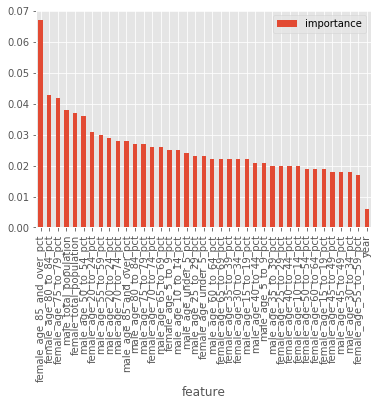

In [111]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()

Interestingly, the feature of most importance according to the chart above is the percent of females that
are age 85 and older. That importance is close to .07 so it's not all that important, but still interesting. After the percentages of the three oldest ages of females, the next in importance is the female and male total population, which I might have thought would have been first. 

## Time series simple OLS prediction 

### "Population Momentum" approach 

#dependent variable = total_population_women   
#independent variable = time 

Simple model where x1 is time and the coefficient is one unit increase in total women's population per year
See if the slope is statistically significant and positive or negative for each county

If the slope is positive and statistically significant (low enough p value), so we can predict the pop will go up, 
and when its negative and p value is small enough we can predict down
    
In other words, we can identify the counties for which this approach is a slam dunk
(takes into account all the rates)

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
#Making an np.array for time: 0, 1, 2.. 6  are for 6 years of time data / putting in 1s for the constant term

X = np.array([[1,1,1,1,1,1,], [i for i in range(6)]]) 
X =X.T #have to transpose
print(X)  

[[1 0]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]]


In [83]:
#Trying it first for just one county

y = df[df['full_county_state']=='Benton County Oregon']['female_total_population']

reg = LinearRegression().fit(X,y)

In [84]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
#Remembered that stats library better than sklearn for getting stats quickly 

import statsmodels.api as sm

In [86]:
model = sm.OLS(y,X)

In [87]:
results = model.fit()

In [88]:
print(results)

In [89]:
results.params  

const    42287.142857
x1         222.342857
dtype: float64

In [90]:
#for this county increase of 222 women for every 1 year 

#need to get SE

In [91]:
results.summary()


/Users/Dolly/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     female_total_population   R-squared:                       0.432
Model:                                 OLS   Adj. R-squared:                  0.290
Method:                      Least Squares   F-statistic:                     3.046
Date:                     Wed, 23 Oct 2019   Prob (F-statistic):              0.156
Time:                             23:40:49   Log-Likelihood:                -44.968
No. Observations:                        6   AIC:                             93.94
Df Residuals:                            4   BIC:                             93.52
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.229e+04    385.722    109.631      0.000    4.12e+04    4.34e+04
x1           222.3429    127.400      1.745      0.156    -131.376     576.062
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.964
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.920
Skew:                          -0.894   Prob(JB):                        0.631
Kurtosis:                       2.308   Cond. No.                         5.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#so for just this one county, we cannot reject the null hypothesis. 

#Now apply this approach to all the counties 

In [93]:
sr = results.summary()

results.pvalues[1]  # skip the constant 

/Users/Dolly/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


0.15588143976503296

In [94]:
results.params[1]

222.34285714285193

Now going to run the model on all the counties, and see where the slope is positive or negative,
and where the p value is small enough that we can reject the null hypothesis. 
   
In other words we can identify the counties for which this is a slam dunk (takes into account all the rates),
and the ones for which it is more challenging to predict the target variable.

In [96]:
county_state_names = df['full_county_state'].unique()

In [97]:
count = 0 
winners = np.array([]) #pop goes up for dependent variable
losers = np.array([])  #pop goes down
midlings = np.array([])  
county_state_names = df['full_county_state'].unique()
#print(county_state_names.shape)


for csn in county_state_names:
    count+=1 
    y = df[df['full_county_state']==csn]['female_total_population']
    if len(y)==6:
        reg = sm.OLS(y,X).fit()  #doing it for each county 
        x1= reg.params[1]  # coefficient
        p1= reg.pvalues[1]  #to get p value
        
        if p1 < .01: # can be strict and use random forest for the rest as one combined approach for all counties
            
            if x1 >0:
                winners = np.append(winners, csn)
            else:
                losers = np.append(losers, csn)
            
        else: 
            midlings = np.append(midlings, csn)  #csn is the country nam
    else:      
        midlings = np.append(midlings, csn) # isnt divisible by 6 --missing some years
        
            
#print(count) 

print("Number of winners = " , len(winners))
print("Number of losers = " , len(losers))
print("Number of midlings = " , len(midlings))

Number of winners =  358
Number of losers =  53
Number of midlings =  418


In [106]:
df['total_population'] = df['female_total_population'] + df['male_total_population']

In [ ]:
count = 0 
winners = np.array([]) #pop goes up for dependent variable
losers = np.array([])  #pop goes down
midlings = np.array([])  
county_state_names = df['full_county_state'].unique()
#print(county_state_names.shape)


for csn in county_state_names:
    count+=1 
    y = df[df['full_county_state']==csn]['total_population']
    if len(y)==6:
        reg = sm.OLS(y,X).fit()  #doing it for each county 
        x1= reg.params[1]  # coefficient
        p1= reg.pvalues[1]  #to get p value
        
        if p1 < .01: # can be strict and use random forest for the rest as one combined approach for all counties
            
            if x1 >0:
                winners = np.append(winners, csn)
            else:
                losers = np.append(losers, csn)
            
        else: 
            midlings = np.append(midlings, csn)  #csn is the country nam
    else:      
        midlings = np.append(midlings, csn) # isnt divisible by 6 --missing some years
        
            
#print(count) 

print("Number of winners = " , len(winners))
print("Number of losers = " , len(losers))
print("Number of midlings = " , len(midlings))

In [108]:
#Just curious to see what the results would be if I set alpha to .05 rather than .01:

count = 0 
winners = np.array([]) #pop goes up for dependent variable
losers = np.array([])  #pop goes down
midlings = np.array([])  
county_state_names = df['full_county_state'].unique()
#print(county_state_names.shape)


for csn in county_state_names:
    count+=1 
    y = df[df['full_county_state']==csn]['total_population']
    if len(y)==6:
        reg = sm.OLS(y,X).fit()  #doing it for each county 
        x1= reg.params[1]  # coefficient
        p1= reg.pvalues[1]  #to get p value
        
        if p1 < .05: # can be strict and use random forest for the rest as one combined approach for all counties
            
            if x1 >0:
                winners = np.append(winners, csn)
            else:
                losers = np.append(losers, csn)
            
        else: 
            midlings = np.append(midlings, csn)  #csn is the country nam
    else:      
        midlings = np.append(midlings, csn) # isnt divisible by 6 --missing some years
        
            
#print(count) 

print("Number of winners = " , len(winners))
print("Number of losers = " , len(losers))
print("Number of midlings = " , len(midlings))

Number of winners =  554
Number of losers =  141
Number of midlings =  134


So we have clear predictions of up or down, with p-value <.01, for 510 (up) + 112 (down) counties, with 207
midlings for which we cannot reject the null hypothesis.
And for a more forgiving (and standard) alpha of .05, the target pop predictions for 554 counties are up, 
141 down, and there are 134 that are midling (indeterminate at this point).

For the tougher ones to predict, the midlings, we will turn to random forest. A more complex algorithm for 
a more complex problem. (We can use feature importance in the RF for some insight into what's going on.)

Or: for the middlings we can also look at fraction of women in childbirth and mortality, using some of
the numbers I collected in the research phase, particularly for people over 70 and women 15-44 (the childbearing
years)

Can also use the same OLS approach by state - since it is categorical, have to convert by target encoding
or one hot encoding (at least in Python)

In [ ]:
Finally, we can also do a gradient boost decision tree with no subsetting, for another perspective

In [ ]:
So basically we got the low-hanging fruit first with the simpler model

### Random Forest on the middlings


In [99]:
midlings

array(['Summit County Ohio', 'Tuscarawas County Ohio',
       'Wayne County Ohio', 'Wood County Ohio', 'Creek County Oklahoma',
       'Payne County Oklahoma', 'Wagoner County Oklahoma',
       'Benton County Oregon', 'Douglas County Oregon',
       'Josephine County Oregon', 'Klamath County Oregon',
       'Umatilla County Oregon', 'Adams County Pennsylvania',
       'Allegheny County Pennsylvania', 'Beaver County Pennsylvania',
       'Berks County Pennsylvania', 'Blair County Pennsylvania',
       'Butler County Pennsylvania', 'Carbon County Pennsylvania',
       'Lebanon County Pennsylvania', 'Lycoming County Pennsylvania',
       'Monroe County Pennsylvania', 'Northampton County Pennsylvania',
       'Washington County Pennsylvania', 'Kent County Rhode Island',
       'Newport County Rhode Island', 'Providence County Rhode Island',
       'Washington County Rhode Island', 'Florence County South Carolina',
       'Greenwood County South Carolina', 'Laurens County South Carolina',
 

In [ ]:
# Get midlings: Need to just select the rows where df['full_county_state'] = midlings

index = []

for y in df['full_county_state']:  
    if y in midlings:
        index.append(True)
    else:
        index.append(False)

s = pd.Series(index, name='bools')

mid_df= df[s.values]



In [ ]:
# from sklearn.model_selection import train_test_split

# y = df1['county_population_increased_2015_2016']
# X = df1.drop(['county_population_increased_2015_2016', 'county name', 'state', 'full_county_state'], axis=1)

# X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score
# rfc = RandomForestClassifier(n_estimators = 100) #ok for small dataset
# rfc.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import train_test_split

y = mid_df['county_population_increased_2015_2016']
X = mid_df.drop(['county_population_increased_2015_2016', 'county name', 'state', 'full_county_state'], axis=1)

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rfc = RandomForestClassifier(n_estimators = 100) #ok for small dataset
rfc.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rfc = RandomForestClassifier(n_estimators = 100) #ok for small dataset
rfc.fit(X_train, y_train)

In [ ]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

In [ ]:
#to get the training ROC score

y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

r_a_score = roc_auc_score(y_train, y_scores)

print("ROC-AUC-Score:", r_a_score) #training error

In [ ]:
y_scores = random_forest.predict_proba(X_test)
y_scores = y_scores[:,1]

r_a_score = roc_auc_score(y_test, y_scores)

print("ROC-AUC-Score:", r_a_score) #testing error

In [ ]:

#most important settings are the number of trees in the forest (n_estimators) and the number 
#of features considered for splitting at each leaf node (max_features). 


In [ ]:
from sklearn.model_selection import RandomizedSearchCV  # or better would be gridsearchCV, more time

random_grid = {
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 150, 300, 350, 400]}

CV_RSrandom_forest = RandomizedSearchCV(estimator=random_forest, param_distributions=random_grid, cv= 5) #pass in dictionary
CV_RSrandom_forest.fit(X_train, y_train)

print(CV_RSrandom_forest.best_params_)


In [ ]:
y_pred = CV_RSrandom_forest.predict(X_test)

(y_pred ==y_test).mean()

## Hamilton-Perry Method

Here is another approach, based on Hamilton-Perry Method of population forecasting which I discovered when I was reading up on population growth.

Hamilton-Perry uses only age and sex in 5 year cohort populations to predict population growth, so that seemed promising. Their model typically is used for 10 year periods, it's not set up in percentages, and their syntax was confusing. More seriously, the model has shortcomings in terms of making the assumption that the rate of change from 5 year cohort to cohort is the same, i.e one fifth of the first five year cohort always moves on to the next five year age group. But as a baseline I thought it could work, and for age cohorts where people were more likely to move or die, I figured I could later change the weights in another iteration.

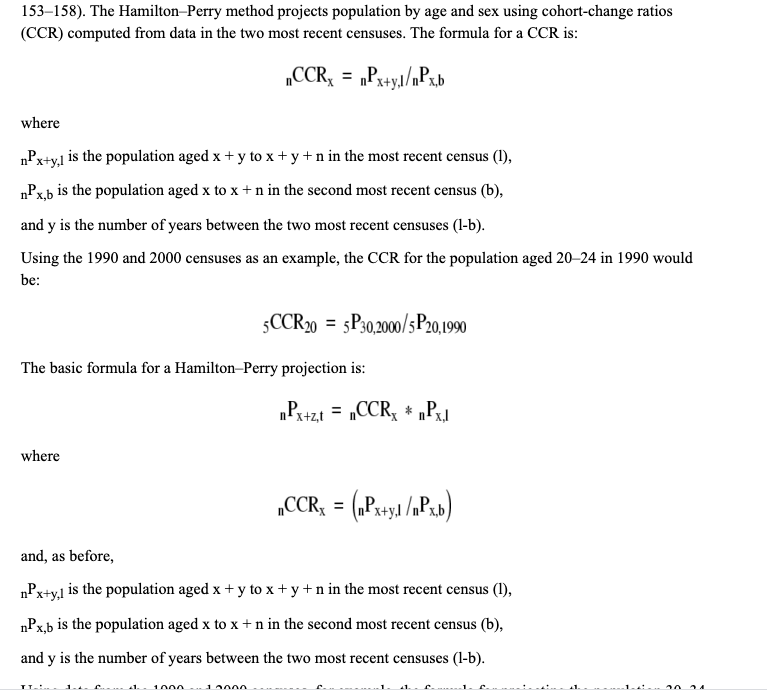

In [3]:
#Here is the source //www.ncbi.nlm.nih.gov/pmc/articles/PMC2822904/

from IPython.display import Image
from IPython.core.display import HTML 
path = '/Users/dollysetton/Desktop/Hamilton.png'
Image(filename = path, width=500, height=500)


In [ ]:
 #nPop_x, 1     -- > Pop aged x to x + 1 in year = 1

#nPop_x_y, b  -- > Pop aged x to x + n in year b

In [ ]:
#Here is an example of how the set up would work, where we assume those rates are constant to begin with: 

#old_data = Pop(2000 age 5- 9)
#new_data = 0.8 * Pop(2001 age 5-9) + 0.2 Pop(2001 age 10 -14)

 In the County Census problem, we can try this approach in two different ways,
either based on a 5-year change in demographic proportions from 2010 to 2015,
or just focusing on a 1-year change from 2014 to 2015.

In [ ]:
# Two versions: 
# 1) calculate CCW (cohort change rate) based on the difference from 2010 to 2015
# 2) calculate the change rate based on 2014 to 2015

# This is the one year version, with one sample age cohort typed in
# old_data = Pop(2000 age 5-9) 
# new_data = 0.8 * Pop(2001 age 5-9) + 0.2 Pop(2001 age 10-14)
# CCR_historical = new_data/old_data

# CWR_historical =  (0.2*Pop(2001 age 0-4) + 0.8*Pop(2000 age 0-4))/Pop(2000 age 15-44)

# The five year version
# old_data = Pop(2000 age 5-9) 
# new_data = Pop(2005 age 10-14)
# CCR_historical = new_data/old_data

# CWR_historical =Pop(2005 age 0-4)/Pop(2000 age 15-44) #how many kids did childbearing women have

To further implement the model as a baseline (before changing weights), I would make a list of pairs of tuples with two five year age cohorts in each pair, and then iterate through that.

With those results, would then have to multiply the final percentages by the total population for the appropriate year, and compare to the appropriate year to see if the population had gone up or down. And then later, would address the fact that the rates of progression from age cohort to cohort are unrealistically constant, and would make modifications as a next step..

I would use the df_cleaned version of the data (rather than df), in which I flattened the data for the purposes of trying an adaptation of the Hamilton Perry Method as described here.

## Summary 

I first explored and cleaned the data. I identified missing values and created a column that combined county and state names because there are multiple counties with the same name. I set aside the missing values for later imputing, and indicated how I would do that (through considering the mean of the state, or a KNN algorithm that takes demographics into account, or a combination of those or other approaches). My early analysis  indicated that the 'state' was an important variable: I calculated the mean dependent variable for each state and displayed
the distribution in a histogram. 

I also noted and visualized that there were twice as many positive as negative classes 
for the dependent variable, so that offered a basic prediction of two thirds True/positive class on which
the model here had to improve.  I also did some research on birth and mortality rates
that in a later more complex model would be useful. I also learned about the Hamilton-Perry model, which predicts the rate that each 5 year cohort 'graduates' to the next cohort at a constant rate. Initially that was the model I had in mind when I flattened the dataset so that the demographics were connected to times across the columns of the dataset, rather than having the years sequestered in one column. I figured I could adjust the weights later based on the rates I had read about for childbirth and mortality, etc, and use it as a baseline. I started to do that and set up a loop, etc, then thought of what I thought was a more efficient approach given the time constraints.  

I realized that if there was a trend of the population growing say six years in a row, it was very likely to grow in the 7th year as well. That one factor seemed liked an easy way to make a prediction for some of the counties where the trend was especially strong.

For a quick baseline model, I started with an "All In" random forest model, that operates on all the numerical variables, plus the state, which I targeted encoded with the mean value of the dependent variable for each state (another approach would be to one hot encode the state variable). The AUC ROC results were a decent 89% on the test data without tuning, though with a 99% accuracy on the training data, the model was clearly overfitting and the hyperparameters should be tuned. I also ran feature importance on the RF model, and suprisingly the three oldest age female cohorts came out highest, above the female and male total populations, which came next. 

Beyond this baseline, I  decided to divide my analysis into several parts, using different models on different parts of the data: a simple OLS time series model would work for the "simpler" county data and then I could develop more complex models for the harder to predict counties (which might take into account childbearing years, mortality, state, etc). In the OLS model, time was the independent variable (ie which year) and the dependent variable was total_population (I also tried it with just the total population of women as the dependent variable, which predictably wasn't as powerful.) 

With this simple "Population Momentum" OLS approach with the p-value alpha set at a very strict .01, 
the results for predicting the total population were:
    
Number of Growers (coded as 'winners') =  510

Number of Shrinkers (coded as 'losers') =  112

Number of Unknown (coded as 'midlings')=  207

I used an especially strict alpha since I was going to use another model for the trickier data, and this is such 
a simple approach. Just for curiosity's sake, I also ran the model with the more traditional alpha threshold
set at .05. For that approach, the results were:
    
Number of Growers =  554

Number of Shrinkers =  141

Number of Unknown =  134
    

In [109]:
#These counties were predicted to go up in population in 2015_2016 with the stricter p-value threshold of .01:
    
print(winners)

['Tuscarawas County Ohio' 'Warren County Ohio' 'Wayne County Ohio'
 'Wood County Ohio' 'Canadian County Oklahoma' 'Cleveland County Oklahoma'
 'Creek County Oklahoma' 'Oklahoma County Oklahoma'
 'Payne County Oklahoma' 'Pottawatomie County Oklahoma'
 'Rogers County Oklahoma' 'Tulsa County Oklahoma'
 'Wagoner County Oklahoma' 'Benton County Oregon'
 'Clackamas County Oregon' 'Deschutes County Oregon'
 'Jackson County Oregon' 'Josephine County Oregon' 'Lane County Oregon'
 'Linn County Oregon' 'Marion County Oregon' 'Multnomah County Oregon'
 'Polk County Oregon' 'Washington County Oregon' 'Yamhill County Oregon'
 'Adams County Pennsylvania' 'Allegheny County Pennsylvania'
 'Berks County Pennsylvania' 'Butler County Pennsylvania'
 'Centre County Pennsylvania' 'Chester County Pennsylvania'
 'Cumberland County Pennsylvania' 'Dauphin County Pennsylvania'
 'Delaware County Pennsylvania' 'Franklin County Pennsylvania'
 'Lancaster County Pennsylvania' 'Lebanon County Pennsylvania'
 'Lehigh Cou

In [110]:
#These counties were predicted to go down in population in 2015_2016:
    
print(losers)

['Trumbull County Ohio' 'Muskogee County Oklahoma'
 'Armstrong County Pennsylvania' 'Beaver County Pennsylvania'
 'Blair County Pennsylvania' 'Cambria County Pennsylvania'
 'Carbon County Pennsylvania' 'Clearfield County Pennsylvania'
 'Crawford County Pennsylvania' 'Erie County Pennsylvania'
 'Fayette County Pennsylvania' 'Indiana County Pennsylvania'
 'Lackawanna County Pennsylvania' 'Lawrence County Pennsylvania'
 'Luzerne County Pennsylvania' 'Mercer County Pennsylvania'
 'Monroe County Pennsylvania' 'Northumberland County Pennsylvania'
 'Schuylkill County Pennsylvania' 'Somerset County Pennsylvania'
 'Westmoreland County Pennsylvania' 'Darlington County South Carolina'
 'Orangeburg County South Carolina' 'Calhoun County Alabama'
 'Etowah County Alabama' 'Montgomery County Alabama'
 'Talladega County Alabama' 'Walker County Alabama'
 'Cochise County Arizona' 'Jefferson County Arkansas'
 'Kings County California' 'Litchfield County Connecticut'
 'Middlesex County Connecticut' 'Tolla

The rest of the counties, called the midlings, were analyzed with a random forest model. I didn't have
quite enough time to tune the model, but I did indicate some relevant code. I also ran a gradient boosted model 
on the middlings, which also needs to be tuned. These are just preliminary models. (Normally with more time I would also
also include a cleaning data function, more visualizations, etc.)

And finally, I sketched out another approach, based on the Hamilton-Perry Method
of population forecasting.